In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [41]:
data=pd.read_csv("cr_loan2.csv")

In [42]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [44]:
print(data.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


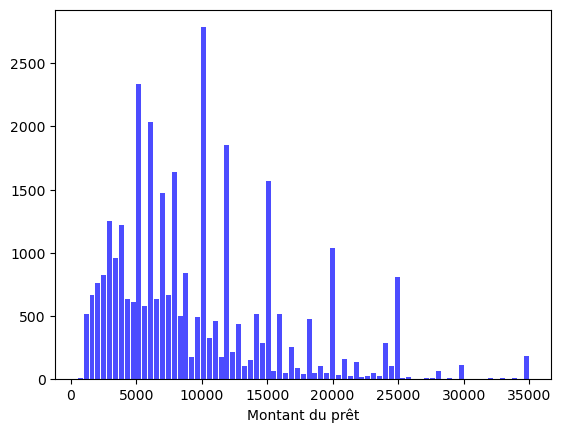

In [45]:
# Examiner la distribution des montants des prêts avec un histogramme
n, bins, patches = plt.hist(x=data['loan_amnt'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel("Montant du prêt")
plt.show()

Il y a 32 000 lignes de données, donc le tracé du nuage de points pourrait prendre un peu de temps.


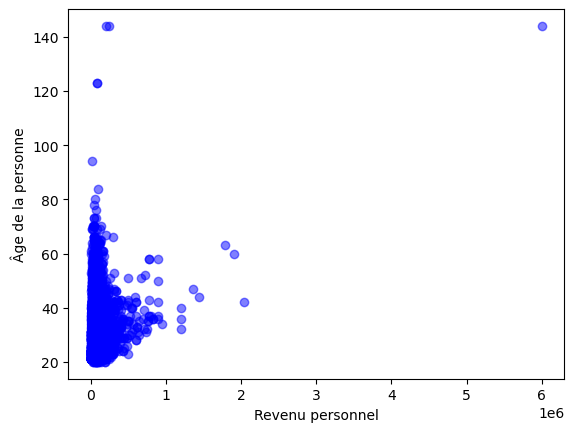

In [46]:
print("Il y a 32 000 lignes de données, donc le tracé du nuage de points pourrait prendre un peu de temps.")

# Tracer un nuage de points du revenu en fonction de l'âge
plt.scatter(data['person_income'], data['person_age'], c='blue', alpha=0.5)
plt.xlabel('Revenu personnel')
plt.ylabel('Âge de la personne')
plt.show()

In [47]:
# Créer un tableau croisé de l'objet du prêt et du statut du prêt
print(pd.crosstab(data['loan_intent'], data['loan_status'], margins=True))


loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [48]:
# Créer un tableau croisé de la propriété du logement, du statut du prêt et de la qualité du prêt
print(pd.crosstab(data['person_home_ownership'], [data['loan_status'], data['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [49]:
# Créer un tableau croisé de la propriété du logement, du statut du prêt et du pourcentage moyen de revenu
print(pd.crosstab(data['person_home_ownership'], data['loan_status'],
                  values=data['loan_percent_income'], aggfunc='mean'))


loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


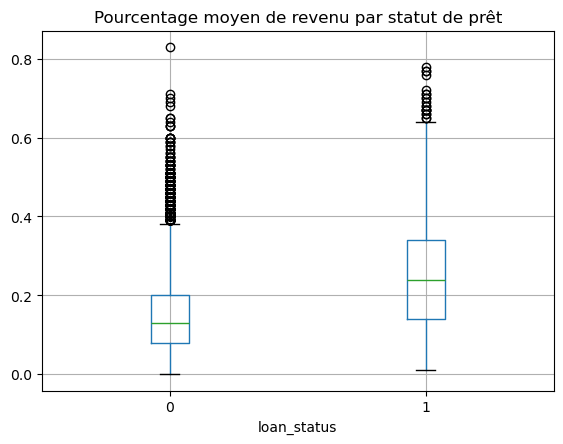

In [50]:
# Créer un diagramme en boîte du pourcentage de revenu par statut de prêt
data.boxplot(column=['loan_percent_income'], by='loan_status')
plt.title('Pourcentage moyen de revenu par statut de prêt')
plt.suptitle('')
plt.show()

In [51]:
# Créer un tableau croisé pour le statut du prêt, la propriété du logement et la durée d'emploi maximale
print(pd.crosstab(data['loan_status'], data['person_home_ownership'],
                  values=data['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [52]:
# Créer un tableau croisé pour le statut du prêt, la propriété du logement et la durée d'emploi maximale
print(pd.crosstab(data['loan_status'], data['person_home_ownership'],
                  values=data['person_emp_length'], aggfunc='max'))

# Créer un tableau d'indices où la durée d'emploi est supérieure à 60
indices = data[data['person_emp_length'] > 60].index


person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [53]:
# Créer un tableau croisé pour le statut du prêt, la propriété du logement et la durée d'emploi maximale
print(pd.crosstab(data['loan_status'], data['person_home_ownership'],
                  values=data['person_emp_length'], aggfunc='max'))

# Créer un tableau d'indices où la durée d'emploi est supérieure à 60
indices = data[data['person_emp_length'] > 60].index

# Supprimer les enregistrements des données en fonction des indices et créer un nouveau DataFrame
data_new = data.drop(indices)


person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [54]:
# Créer un tableau croisé pour le statut du prêt, la propriété du logement et la durée d'emploi maximale
print(pd.crosstab(data['loan_status'], data['person_home_ownership'],
                  values=data['person_emp_length'], aggfunc='max'))

# Créer un tableau d'indices où la durée d'emploi est supérieure à 60
indices = data[data['person_emp_length'] > 60].index

# Supprimer les enregistrements des données en fonction des indices et créer un nouveau DataFrame
data_new = data.drop(indices)

# Créer le tableau croisé précédent et inclure la durée d'emploi minimale
print(pd.crosstab(data_new['loan_status'], data_new['person_home_ownership'],
                  values=data_new['person_emp_length'], aggfunc=['min', 'max']))


person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0
                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


Les quatre codes se complètent de la manière suivante :

Premier code : Crée un tableau croisé pour examiner la durée d'emploi maximale par statut de prêt et type de propriété.

Deuxième code : Identifie les indices où la durée d'emploi dépasse 60 ans (valeurs aberrantes).

Troisième code : Supprime les enregistrements avec une durée d'emploi supérieure à 60 et crée un nouveau DataFrame sans ces valeurs aberrantes.

Quatrième code : Recrée le tableau croisé en incluant cette fois-ci à la fois la durée d'emploi minimale et maximale après suppression des valeurs aberrantes.

Ils forment un flux d'analyse des valeurs aberrantes, de leur détection à leur suppression, suivi d'une nouvelle analyse des données nettoyées.

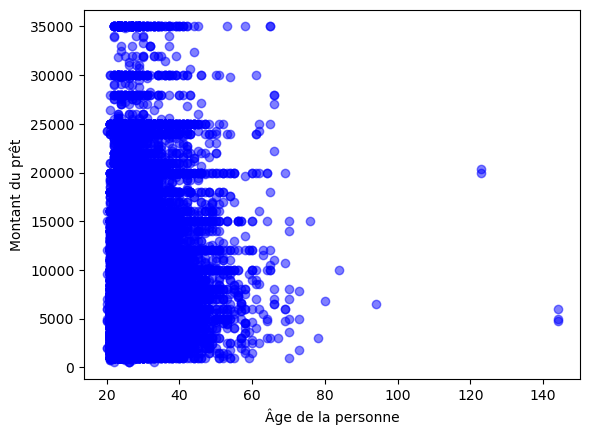

In [55]:
# Créer un nuage de points pour l'âge et le montant du prêt
plt.scatter(data['person_age'], data['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Âge de la personne")
plt.ylabel("Montant du prêt")
plt.show()

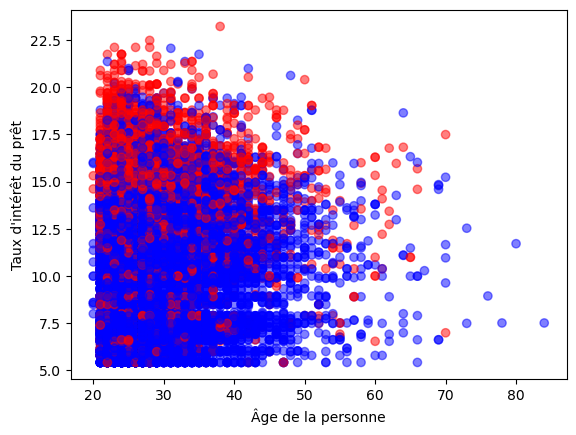

In [56]:
import matplotlib.pyplot as plt
import matplotlib.colors

# Utiliser Pandas pour supprimer les enregistrements du DataFrame et en créer un nouveau
data_new = data.drop(data[data['person_age'] > 100].index)

# Créer un nuage de points pour l'âge et le taux d'intérêt
colors = ["blue", "red"]
plt.scatter(data_new['person_age'], data_new['loan_int_rate'],
            c=data_new['loan_status'],
            cmap=matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Âge de la personne")
plt.ylabel("Taux d'intérêt du prêt")
plt.show()


Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

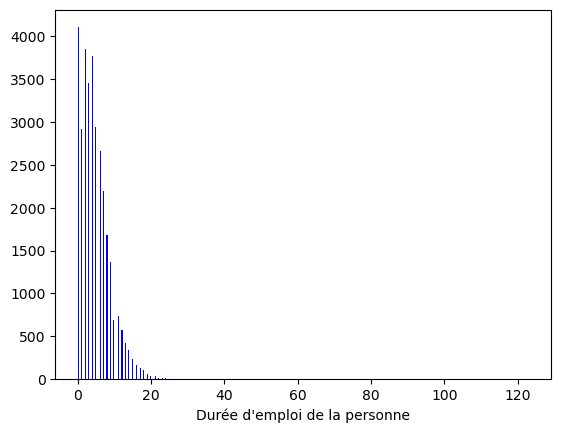

In [57]:
# Afficher un tableau des colonnes contenant des valeurs nulles
print(data_new.columns[data_new.isnull().any()])

# Afficher les cinq premières lignes avec des valeurs nulles pour la durée d'emploi
print(data_new[data_new['person_emp_length'].isnull()].head())

# Remplacer les valeurs nulles par la valeur médiane de toutes les durées d'emploi
data_new['person_emp_length'] = data_new['person_emp_length'].fillna(data_new['person_emp_length'].median())

# Créer un histogramme de la durée d'emploi
n, bins, patches = plt.hist(data_new['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Durée d'emploi de la personne")
plt.show()


In [58]:
# Afficher le nombre de valeurs nulles dans la colonne loan_int_rate
print(data['loan_int_rate'].isnull().sum())

# Stocker les indices des lignes contenant des valeurs nulles dans loan_int_rate
indices = data[data['loan_int_rate'].isnull()].index

# Sauvegarder les nouvelles données sans les données manquantes
data_clean = data.drop(indices)


3116


In [59]:
data_clean=pd.read_csv("cr_loan_nout_nmiss.csv")

Comment traiter les données manquantes
Alors, comment traiter les données manquantes ? Le plus souvent, cela se fait de trois façons. Parfois, nous devons remplacer les valeurs manquantes, par exemple en remplaçant une valeur nulle par la valeur moyenne de cette colonne. D'autres fois, nous supprimons complètement la ligne avec des données manquantes. Par exemple, s'il y a des valeurs nulles dans le montant du prêt, nous devons supprimer ces lignes entièrement. Il arrive aussi que nous conservions les valeurs manquantes, mais cela est rare dans les données de prêt. Comprendre les données nous guidera vers l'une de ces trois actions.

Pour obtenir ces probabilités, nous entraînons des modèles de machine learning sur nos colonnes de données de crédit, appelées features (caractéristiques), afin que les modèles apprennent à utiliser les données pour prédire les probabilités. Ces modèles sont connus sous le nom de modèles de classification, où la classe est "défaut" ou "non-défaut". Dans l'industrie, deux modèles sont fréquemment utilisés : la régression logistique et les arbres de décision.

Entraînement et test
En général, en machine learning, nous divisons notre jeu de données entier en deux ensembles de données distincts.
Ces ensembles sont le jeu d'entraînement et le jeu de test. Nous utilisons la majorité des données pour entraîner nos modèles, afin qu'ils apprennent autant que possible à partir des données. Notre jeu de test est utilisé pour voir comment notre modèle réagit à de nouvelles données qu'il n'a jamais vues auparavant. C'est comme les élèves qui apprennent à l'école. Ils apprennent des faits sur un sujet et sont testés sur d'autres faits de ce même sujet. De cette manière, nous pouvons évaluer leur maîtrise du sujet.

In [60]:
# Créer les ensembles de données X et y
X = data_clean[['loan_int_rate']]
y = data_clean[['loan_status']]

# Créer et ajuster un modèle de régression logistique
clf_logistic_single = LogisticRegression(solver='lbfgs')
clf_logistic_single.fit(X, np.ravel(y))

# Afficher les paramètres du modèle
print(clf_logistic_single.get_params())

# Afficher l'interception du modèle
print(clf_logistic_single.intercept_)


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.45784525]


In [61]:
# Créer les données X pour le modèle
X_multi = data_clean[['loan_int_rate', 'person_emp_length']]

# Créer un ensemble de données y pour l'entraînement
y = data_clean[['loan_status']]

# Créer et entraîner une nouvelle régression logistique
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Afficher l'interception du modèle
print(clf_logistic_multi.intercept_)


[-4.21644963]


In [62]:
# Créer les ensembles de données X et y
X = data_clean[['loan_int_rate', 'person_emp_length', 'person_income']]
y = data_clean[['loan_status']]

# Utiliser test_train_split pour créer les ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

# Créer et ajuster le modèle de régression logistique
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Afficher les coefficients du modèle
print(clf_logistic.coef_)


[[ 2.88774130e-01 -2.19063447e-02 -1.99385087e-05]]


Les coefficients que tu as obtenus [[ 2.88774130e-01 -2.19063447e-02 -1.99385087e-05]] correspondent aux contributions des variables explicatives (loan_int_rate, person_emp_length, et person_income) dans ton modèle de régression logistique.

Voici l'interprétation de chaque coefficient :

loan_int_rate (0.288774130) :

Ce coefficient est positif, ce qui signifie qu'une augmentation du taux d'intérêt est associée à une augmentation de la probabilité de défaut. Plus le taux d'intérêt est élevé, plus le modèle prévoit que l'emprunteur fera défaut.
person_emp_length (-0.0219063447) :

Ce coefficient est négatif, ce qui indique que plus la durée d'emploi d'une personne est longue, moins elle est susceptible de faire défaut. En d'autres termes, une personne avec une carrière plus stable est vue comme moins risquée par le modèle.
person_income (-0.0000199385087) :

Ce coefficient est proche de zéro, ce qui signifie que le revenu personnel n'a pratiquement aucun impact sur la probabilité de défaut dans ce modèle. Cela pourrait indiquer que, dans ce jeu de données, le revenu ne joue pas un rôle majeur pour prédire les défauts.
Conclusion :
Le taux d'intérêt a l'impact le plus fort sur la probabilité de défaut, suivi de la durée d'emploi, tandis que le revenu personnel a un impact négligeable. Cela pourrait t'orienter dans la sélection des variables les plus importantes pour ce modèle. Si tu veux approfondir ou ajuster le modèle, fais-le moi savoir !

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Sélectionner des colonnes différentes pour X1_train et X2_train
X1 = data_clean[['loan_int_rate', 'person_emp_length']]
X2 = data_clean[['loan_int_rate', 'person_income']]

# Variable cible
y = data_clean['loan_status']

# Diviser les ensembles de données en entraînement et test
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.4, random_state=123)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.4, random_state=123)

In [64]:
# Print the first five rows of each training set
print(X1_train.head())
print(X2_train.head())

# Create and train a model on the first training data
clf_logistic1 = LogisticRegression(solver='lbfgs').fit(X1_train, np.ravel(y_train))

# Create and train a model on the second training data
clf_logistic2 = LogisticRegression(solver='lbfgs').fit(X2_train, np.ravel(y_train))

# Print the coefficients of each model
print(clf_logistic1.coef_)
print(clf_logistic2.coef_)

       loan_int_rate  person_emp_length
22105          14.22                  3
2296           12.68                  2
14465          14.26                  0
6311           15.58                  0
12541          12.53                  1
       loan_int_rate  person_income
22105          14.22          72000
2296           12.68          21000
14465          14.26           4800
6311           15.58          92000
12541          12.53          96000
[[ 0.2712626 -0.0518953]]
[[ 2.89250558e-01 -2.05061519e-05]]


Analyse des coefficients des modèles de régression logistique
Deux modèles de régression logistique ont été entraînés sur différents ensembles de données afin d'analyser l'impact des variables explicatives sur la probabilité de défaut de paiement.
Premier modèle : Entraîné sur les variables loan_int_rate (taux d'intérêt) et person_emp_length (durée d'emploi).
Le coefficient du taux d'intérêt est positif (0.271), indiquant qu'une augmentation du taux d'intérêt augmente la probabilité de défaut.
Le coefficient de la durée d'emploi est négatif (-0.052), ce qui signifie qu'une durée d'emploi plus longue réduit la probabilité de défaut.
Deuxième modèle : Entraîné sur les variables loan_int_rate (taux d'intérêt) et person_income (revenu personnel).
Le coefficient du taux d'intérêt est également positif (0.289), confirmant que le taux d'intérêt est un facteur important dans la prédiction du défaut.
Le coefficient du revenu personnel est très proche de zéro (-0.00002), suggérant que le revenu personnel n'a presque aucun impact sur la probabilité de défaut dans ce modèle.
Conclusion
Le taux d'intérêt est la variable la plus influente dans les deux modèles, augmentant la probabilité de défaut lorsqu'il est élevé. La durée d'emploi a également un effet significatif, une stabilité professionnelle plus longue réduisant le risque de défaut. En revanche, le revenu personnel semble avoir un effet négligeable sur la probabilité de défaut dans ce contexte.

In [65]:
# Créer deux ensembles de données pour les données numériques et non numériques
cred_num = data.select_dtypes(exclude=['object'])
cred_str = data_clean.select_dtypes(include=['object'])

# Appliquer le one-hot encoding aux colonnes non numériques
cred_str_onehot = pd.get_dummies(cred_str)

# Fusionner les colonnes encodées avec les colonnes numériques
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Afficher les colonnes du nouvel ensemble de données
print(cr_loan_prep.columns)


Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


Le jeu de données a été préparé pour un modèle de machine learning, avec une séparation entre les données numériques et non numériques. Les colonnes non numériques comme person_home_ownership, loan_intent et loan_grade ont été encodées en variables binaires via le one-hot encoding, rendant le jeu de données entièrement numérique et prêt à être utilisé pour l'entraînement de modèles de régression logistique ou d'autres algorithmes de machine learning.

In [66]:
# Entraîner le modèle de régression logistique sur les données d'entraînement
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Créer des prédictions de probabilité pour le statut du prêt en utilisant les données de test
preds = clf_logistic.predict_proba(X_test)

# Créer des DataFrames des cinq premières prédictions et des cinq premières étiquettes vraies
preds_df = pd.DataFrame(preds[:, 1][0:5], columns=['prob_default'])
true_df = y_test.head()

# Concaténer et afficher les deux DataFrames pour comparaison
print(pd.concat([true_df.reset_index(drop=True), preds_df], axis=1))


   loan_status  prob_default
0            1      0.386515
1            1      0.455655
2            0      0.072587
3            0      0.133768
4            1      0.147980


Sur la ligne 0, le modèle a prédit une probabilité de défaut de 0.386 (38,6%), alors que le statut réel du prêt (loan_status) indique que le prêt était effectivement en défaut (1).

Cela signifie que, bien que le modèle ait estimé qu'il y avait environ 38,6 % de chances que le prêt soit en défaut, le prêt était en fait en défaut. C'est un cas où le modèle n'était pas très confiant sur le défaut (une probabilité inférieure à 50 %) mais où le prêt a quand même fait défaut.

Quelques points à retenir :
Une probabilité de 0.386 est une probabilité relativement faible, surtout si l'on considère que 50 % est souvent utilisé comme seuil pour décider si un prêt est susceptible de faire défaut ou non.
Le modèle ne prédit pas toujours correctement, et il est courant d'avoir des prédictions avec une probabilité de défaut plus faible dans des cas où le prêt finit en défaut.
Cela montre également qu'il peut être nécessaire d'ajuster le seuil de décision utilisé pour classer un prêt comme en défaut ou non (par exemple, au lieu de 50 %, on pourrait ajuster ce seuil à un autre niveau).
Conclusion :
Le modèle prédit que la probabilité de défaut est faible (environ 38 %), mais l'étiquette réelle montre que le prêt a fait défaut. Cela montre que le modèle peut parfois sous-estimer le risque de défaut, et il serait intéressant de vérifier si d'autres prédictions similaires montrent des

In [67]:
# Créer un DataFrame pour les probabilités de défaut
preds_df = pd.DataFrame(preds[:, 1], columns=['prob_default'])

# Réassigner le statut du prêt en fonction du seuil
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

# Afficher le nombre de lignes pour chaque statut de prêt
print(preds_df['loan_status'].value_counts())

# Afficher le rapport de classification
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))


loan_status
0    10747
1     1037
Name: count, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.82      0.96      0.89      9198
     Default       0.67      0.27      0.38      2586

    accuracy                           0.81     11784
   macro avg       0.74      0.61      0.63     11784
weighted avg       0.79      0.81      0.78     11784



Voici une explication simple et accessible pour un néophyte :

Créer un tableau pour les probabilités de défaut :
Le modèle de régression logistique prédit une probabilité de défaut pour chaque prêt. Ces probabilités sont enregistrées dans un tableau appelé preds_df. Chaque ligne représente un prêt, et la colonne prob_default contient la probabilité que ce prêt fasse défaut.

Réassigner le statut du prêt en fonction d'un seuil :
Ensuite, on utilise un seuil de 0,5 pour décider si un prêt est en défaut ou non. Si la probabilité de défaut est supérieure à 0,5, on considère que le prêt est en défaut (on assigne la valeur 1 à loan_status). Si la probabilité est inférieure ou égale à 0,5, on considère que le prêt n'est pas en défaut (on assigne la valeur 0).

Afficher le nombre de prêts en défaut et non-défaut :
Ensuite, on compte combien de prêts sont classés comme en défaut (1) et combien sont classés comme non-défaut (0). Cela permet de savoir combien de prêts, selon le modèle, risquent de faire défaut.

Afficher un rapport de classification :
Enfin, on utilise un rapport de classification pour comparer les prédictions du modèle avec les résultats réels (les prêts qui ont vraiment fait défaut ou non). Ce rapport inclut des informations comme la précision (combien de fois le modèle a vu juste) et le rappel (combien de prêts en défaut le modèle a bien identifié).

En résumé, ce code entraîne un modèle pour prédire les défauts de prêt, puis évalue la performance du modèle en comparant les prédictions aux résultats réels.

Illustration avec un exemple pour la précision :
Supposons que le modèle ait fait les prédictions suivantes :
1 000 prêts prédits comme Non-Default : parmi eux, 820 étaient effectivement Non-Default.
500 prêts prédits comme Default : parmi eux, 335 étaient effectivement Default.
Le calcul de la précision pour chaque classe serait :
Précision pour Non-Default = 820/1000 = 82%
Précision pour Default = 335/500 =67%
Conclusion :
La différence dans le calcul du dénominateur (le total des prédictions faites pour chaque classe) est la clé. Chaque classe (Default et Non-Default) a son propre dénominateur, ce qui explique pourquoi les précisions de chaque classe ne s'additionnent pas pour faire 100 %.
Maintenant admettons que dans la réalité :
1200 prêts avec non-défault soit un rappel de 820/1200 = 68%
800 prêts en default soit un rappel de 335/800 = 41%
f1 score = moyenne harmonique soit 2 * 0,82 * 0,68/0,82 + 0,68 = 74%


In [68]:
# Créer un DataFrame pour les probabilités de défaut
preds_df = pd.DataFrame(preds[:, 1], columns=['prob_default'])

# Réassigner le statut du prêt en fonction du seuil
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

# Afficher le nombre de lignes pour chaque statut de prêt
print(preds_df['loan_status'].value_counts())

# Afficher le rapport de classification
noms_cibles = ['Non-Défaut', 'Défaut']
print(classification_report(y_test, preds_df['loan_status'], target_names=noms_cibles))


loan_status
0    10747
1     1037
Name: count, dtype: int64
              precision    recall  f1-score   support

  Non-Défaut       0.82      0.96      0.89      9198
      Défaut       0.67      0.27      0.38      2586

    accuracy                           0.81     11784
   macro avg       0.74      0.61      0.63     11784
weighted avg       0.79      0.81      0.78     11784



In [69]:
# Afficher le rapport de classification
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.82      0.96      0.89      9198
     Default       0.67      0.27      0.38      2586

    accuracy                           0.81     11784
   macro avg       0.74      0.61      0.63     11784
weighted avg       0.79      0.81      0.78     11784



In [70]:
# Afficher les valeurs non moyenné du rapport de classification
from sklearn.metrics import precision_recall_fscore_support

print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.82357867, 0.66538091]), array([0.96227441, 0.26682135]), array([0.88754074, 0.38089981]), array([9198, 2586]))


In [71]:
# Afficher les deux premiers nombres du rapport de classification
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0])

[0.82357867 0.66538091]


0.8096571622539036


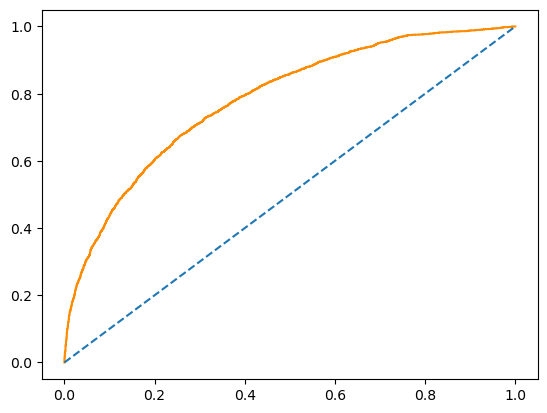

In [72]:
# Importer les fonctions nécessaires
from sklearn.metrics import roc_curve, roc_auc_score

# Créer des prédictions et les stocker dans une variable
preds = clf_logistic.predict_proba(X_test)

# Afficher le score de précision du modèle
print(clf_logistic.score(X_test, y_test))

# Tracer la courbe ROC des probabilités de défaut
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Calculer l'AUC et le stocker dans une variable
auc = roc_auc_score(y_test, prob_default)


In [73]:
# Définir le seuil des défauts à 0,5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Afficher la matrice de confusion
print(confusion_matrix(y_test, preds_df['loan_status']))


[[8851  347]
 [1896  690]]


In [74]:
# Définir le seuil des défauts à 0,4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Afficher la matrice de confusion
print(confusion_matrix(y_test, preds_df['loan_status']))


[[8331  867]
 [1493 1093]]


In [75]:
# Calculer le montant moyen du prêt à partir des données
avg_loan_amnt = data_clean['loan_amnt'].mean()
avg_loan_amnt

9583.600936895346

In [76]:
# Réassigner les valeurs du statut du prêt en fonction du nouveau seuil
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Stocker le nombre de prêts en défaut à partir des données de prédiction
num_defaults = preds_df['loan_status'].value_counts()[1]

# Stocker le rappel des défauts à partir du rapport de classification
default_recall = precision_recall_fscore_support(y_test, preds_df['loan_status'])[1][1]

# Calculer l'impact estimé du nouveau taux de rappel des défauts
print(num_defaults * avg_loan_amnt * (1 - default_recall))


10844663.47626377


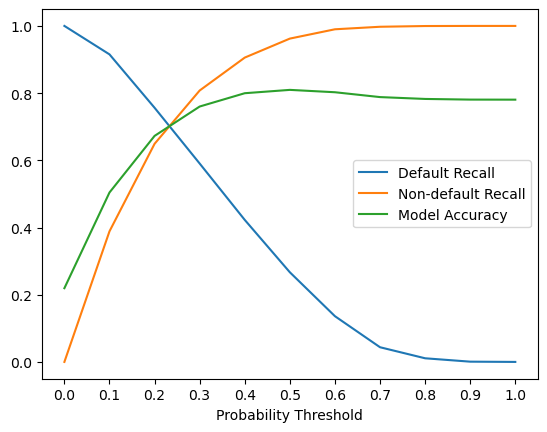

In [77]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score

# Générer une liste de seuils de probabilité de 0 à 1 avec un pas de 0.1
thresh = np.arange(0.0, 1.1, 0.1)

# Initialiser des listes pour stocker les rappels et la précision
def_recalls = []
nondef_recalls = []
accs = []

# Boucler sur chaque seuil pour recalculer le rappel et la précision
for t in thresh:
    # Réassigner les prédictions de statut du prêt selon le seuil
    preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > t else 0)

    # Calculer le rappel pour les défauts (1) et les non-défauts (0)
    def_recalls.append(recall_score(y_test, preds_df['loan_status'], pos_label=1))
    nondef_recalls.append(recall_score(y_test, preds_df['loan_status'], pos_label=0))
    
    # Calculer la précision globale
    accs.append(accuracy_score(y_test, preds_df['loan_status']))

# Optionnel : définir les positions des ticks pour l'axe des x
ticks = np.arange(0.0, 1.1, 0.1)

# Tracer les courbes
plt.plot(thresh, def_recalls)
plt.plot(thresh, nondef_recalls)
plt.plot(thresh, accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall", "Non-default Recall", "Model Accuracy"])
plt.show()


La valeur de 0,275 signifie que si tu fixes le seuil de classification à 0,275, tu obtiens un bon compromis entre le rappel des défauts, le rappel des non-défauts, et la précision globale. C'est le point où les trois métriques sont équilibrées de façon optimale pour ce modèle.